# Creating a Mosaic for Professional Presentations


In [1]:
# importing the libraries

import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

## Line Chart

In [2]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sales = [85, 90, 78, 92, 88, 96, 94, 98, 100, 102, 105, 108]

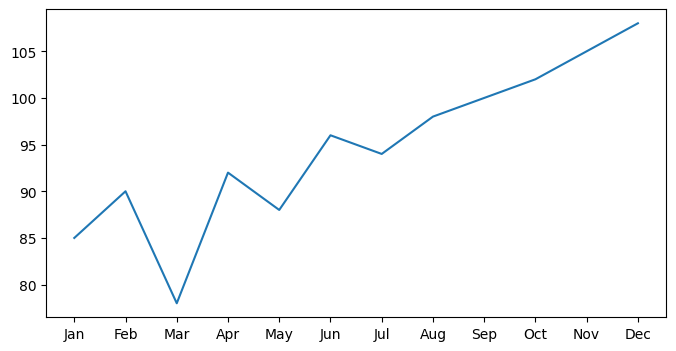

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(months, sales, color='tab:blue')

plt.savefig('graphs/line1.png', dpi=300)

plt.show()

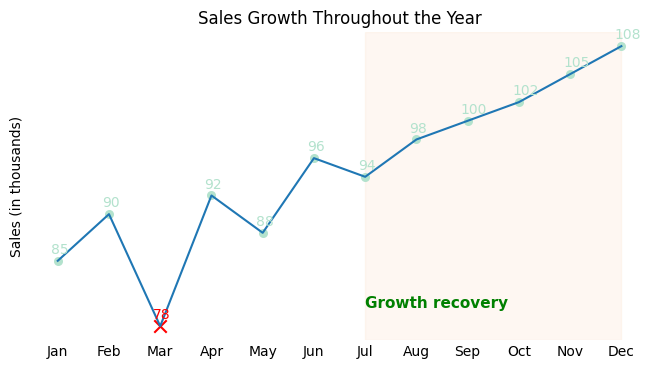

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))

# rc = runtime configuration 
colors = plt.get_cmap('Pastel2').colors
cycle_colors = cycler('color', colors)
plt.rc('axes', prop_cycle=cycle_colors)

ax.plot(months, sales)

# adding a vspan to highlight the range of months with sales starting from July
ax.axvspan(6, 11, color=colors[1], alpha=0.15)

# adding text to highlight the range of months with sales starting from July
ax.text(6, 80, 'Growth recovery', fontsize=11, color='green', weight='bold')

# using `np.where`, create a list of x markers for the minimum value and another for the rest
markers = np.where(sales == np.min(sales), 'x', 'o')
for position, marker in enumerate(markers):
    if marker == 'x':
        color = 'red'
        size = 80
    else:
        color = colors[0]
        size = 30
    ax.scatter(months[position], sales[position], marker=marker, s=size, color=color)
    ax.annotate(sales[position], color=color, xy=(months[position], sales[position]), xytext=(-5, 5), textcoords='offset points')

ax.set_ylabel('Sales (in thousands)')
ax.set_title("Sales Growth Throughout the Year")

ax.set_yticks([])
ax.tick_params(axis='x', length=0)
ax.set_frame_on(False) # removing the borders of the plot

plt.savefig('graphs/line2.png', dpi=300)

plt.show()


## Bar Chart


In [5]:
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
quantities = [23, 45, 17, 30, 37]
data_sorted = sorted(zip(quantities, products))  # by quantity
quantities_sorted = [x[0] for x in data_sorted]
products_sorted = [x[1] for x in data_sorted]

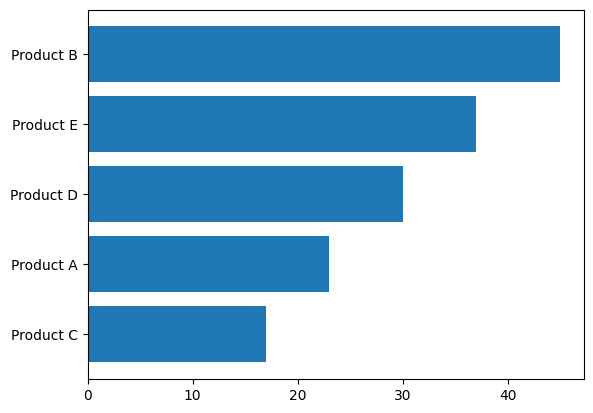

In [6]:
fig, ax = plt.subplots()

bars = ax.barh(products_sorted, quantities_sorted, color='tab:blue')

plt.savefig('graphs/bar1.png', dpi=300)

plt.show()

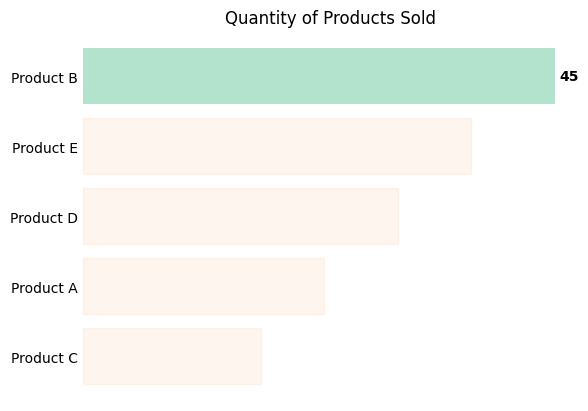

In [7]:
fig, ax = plt.subplots()

bars = ax.barh(products_sorted, quantities_sorted)

ax.bar_label(bars, labels=[max(quantities_sorted) if x == max(quantities_sorted) else '' for x in quantities_sorted],
              padding=3, fontsize=10, fontweight='bold')

# removing the borders of the plot
ax.set_frame_on(False)

# removing x axis
ax.set_xticks([])
ax.tick_params(axis='y', length=0)

# highlighting the bar for the product with the highest sales
for i, bar in enumerate(bars):
    if i != quantities_sorted.index(max(quantities_sorted)):
        bars[i].set_color(colors[1])
        bars[i].set_alpha(0.2)


ax.set_title('Quantity of Products Sold')

plt.savefig('graphs/bar2.png', dpi=300)

plt.show()


## Pie chart


In [8]:
categories = ['Electronics', 'Clothing', 'Food', 'Books']
quantities = [45, 30, 15, 10]

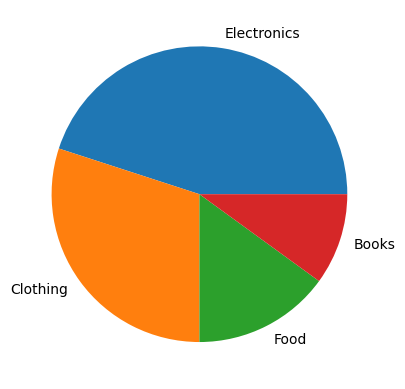

In [9]:
fig, ax = plt.subplots()

ax.pie(quantities, labels=categories, colors=['tab:blue','tab:orange', 'tab:green', 'tab:red'])

plt.savefig('graphs/pie1.png', dpi=300)

plt.show()

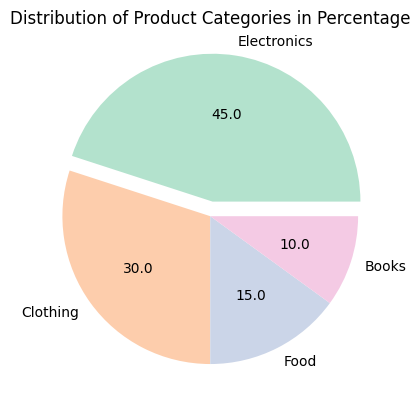

In [10]:
detach = [0.1, 0, 0, 0]  # detach the first slice

fig, ax = plt.subplots()

ax.pie(quantities, labels=categories, colors=colors, autopct='%.1f', explode=detach)
ax.set_title('Distribution of Product Categories in Percentage')

plt.savefig('graphs/pie2.png', dpi=300)

plt.show()


## Stacked Bar Chart


In [11]:
years = [2018, 2019, 2020, 2021]
sales_online = [5, 10, 15, 20]
sales_store = [10, 8, 6, 4]

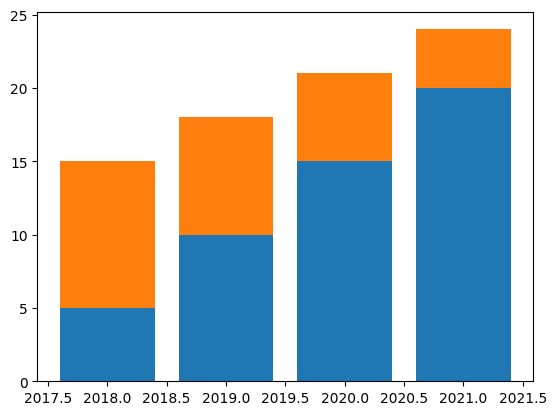

In [12]:
fig, ax = plt.subplots()

bar_online = ax.bar(years, sales_online, label='Online', color='tab:blue')
bar_store = ax.bar(years, sales_store, bottom=sales_online, label='Store', color='tab:orange')

plt.savefig('graphs/stacked1.png', dpi=300)

plt.show()

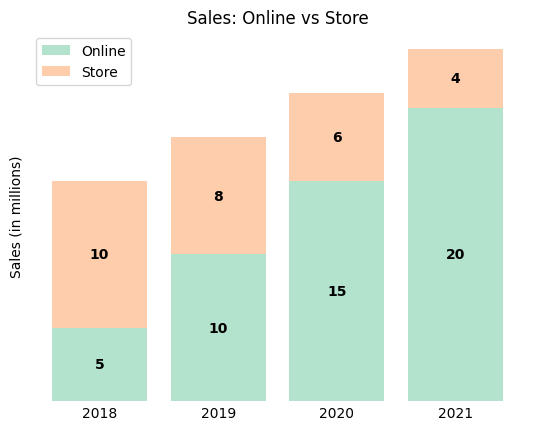

In [13]:
fig, ax = plt.subplots()

bar_online = ax.bar(years, sales_online, label='Online')
bar_store = ax.bar(years, sales_store, bottom=sales_online, label='Store')
ax.bar_label(bar_online, labels=sales_online, fontsize=10, fontweight='bold', label_type='center')
ax.bar_label(bar_store, labels=sales_store, fontsize=10, fontweight='bold', label_type='center')

# forcing the years to be displayed as integers
ax.set_xticks(ticks=years)
ax.set_yticks([])
ax.tick_params(axis='x', length=0)
ax.set_frame_on(False)

ax.set_ylabel('Sales (in millions)')
ax.set_title('Sales: Online vs Store')
ax.legend()

plt.savefig('graphs/stacked2.png', dpi=300)

plt.show()


# The full Mosaic

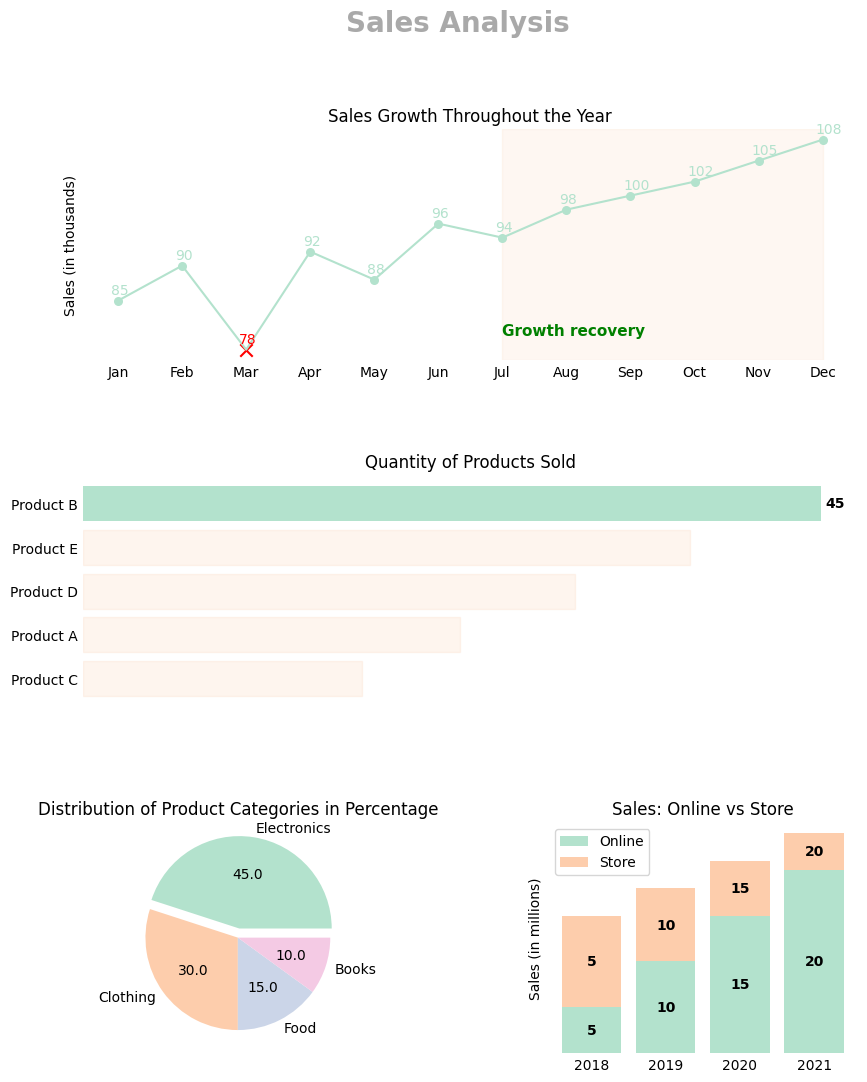

In [14]:
# creating the mosaic
structure = "AA;BB;CD"
fig = plt.figure(figsize=(10, 12))
spacing = {'wspace': 0.5, 'hspace': 0.5}
axs = fig.subplot_mosaic(structure, gridspec_kw=spacing)

# first chart ----------------------------------------------------------------------
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
         'Dec']
sales = [85, 90, 78, 92, 88, 96, 94, 98, 100, 102, 105, 108]

axs['A'].plot(months, sales)

# adding a vspan to highlight the range of months with sales starting fro
axs['A'].axvspan(6, 11, color=colors[1], alpha=0.15)

# adding text to highlight the range of months with sales starting from July
axs['A'].text(6, 80, 'Growth recovery', fontsize=11, color='green',
                  weight='bold')

# using `np.where`, create a list of x markers for the minimum value and another for the rest
markers = np.where(sales == np.min(sales), 'x', 'o')
for position, marker in enumerate(markers):
    if marker == 'x':
        color = 'red'
        size = 80
    else:
        color = colors[0]
        size = 30
    axs['A'].scatter(months[position], sales[position], marker=marker, s=size,
                         color=color)
    axs['A'].annotate(sales[position], color=color,
                          xy=(months[position], sales[position]), xytext=(-5, 5),
                          textcoords='offset points')

axs['A'].set_ylabel('Sales (in thousands)')
axs['A'].set_title('Sales Growth Throughout the Year')

axs['A'].set_yticks([])
axs['A'].tick_params(axis='x', length=0)
axs['A'].set_frame_on(False)

# second chart ----------------------------------------------------------------------
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
quantities = [23, 45, 17, 30, 37]

data_sorted = sorted(zip(quantities, products))  # by quantity
quantities_sorted = [x[0] for x in data_sorted]
products_sorted = [x[1] for x in data_sorted]

bars = axs['B'].barh(products_sorted, quantities_sorted)

axs['B'].bar_label(bars, labels=[
    max(quantities_sorted) if x == max(quantities_sorted) else '' for x in
    quantities_sorted],
                       padding=3, fontsize=10, fontweight='bold')

axs['B'].set_frame_on(False)
axs['B'].set_xticks([])
axs['B'].tick_params(axis='y', length=0)

# highlighting the bar for the product with the highest sales
for i, bar in enumerate(bars):
    if i != quantities_sorted.index(max(quantities_sorted)):
        bars[i].set_color(colors[1])
        bars[i].set_alpha(0.2)

axs['B'].set_title('Quantity of Products Sold')

# third chart ----------------------------------------------------------------------
categories = ['Electronics', 'Clothing', 'Food', 'Books']
quantities = [45, 30, 15, 10]
detach = [0.1, 0, 0, 0]  # detach the first slice

axs['C'].pie(quantities, labels=categories, autopct='%.1f', explode=detach)
axs['C'].set_title('Distribution of Product Categories in Percentage')

# fourth chart  ----------------------------------------------------------------------
years = [2018, 2019, 2020, 2021]
sales_online = [5, 10, 15, 20]
sales_store = [10, 8, 6, 4]

bar_online = axs['D'].bar(years, sales_online, label='Online')
bar_store = axs['D'].bar(years, sales_store, bottom=sales_online, label='Store')
axs['D'].bar_label(bar_online, labels=sales_online, fontsize=10,
                       fontweight='bold', label_type='center')
axs['D'].bar_label(bar_store, labels=sales_online, fontsize=10, fontweight='bold',
                       label_type='center')
axs['D'].set_xticks(ticks=years)
axs['D'].set_yticks([])
axs['D'].tick_params(axis='x', length=0)
axs['D'].set_frame_on(False)
axs['D'].set_ylabel('Sales (in millions)')
axs['D'].set_title('Sales: Online vs Store')
axs['D'].legend()

# configuring the figure and displaying it -------------------------------------------------------

# figure title
fig.suptitle('Sales Analysis', fontsize=20, fontweight='bold', color='darkgrey')

# saving figure
plt.savefig('graphs/mosaic.png', dpi=300)

plt.show()
